In [ ]:
#Assignment 4
#Amit pawar
#prn:25070126501
#Assignment 4: Ridge and Lasso Regression
#using A dataset for BMW car dataset using Ridge and Lasso Regression.

# Task
I have performed Ridge and Lasso regression on the `bmw.csv` dataset.

Here's a summary of the work done:

1.  **Data Preparation**:
    *   The `bmw.csv` dataset was loaded.
    *   'price' was set as the target variable (`y`).
    *   The following features were selected: 'model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', and 'engineSize'.
    *   One-hot encoding was applied to the categorical features ('model', 'transmission', 'fuelType') using `pd.get_dummies()` with `drop_first=True`.
    *   The processed data was split into training and testing sets (`X_train`, `X_test`, `y_train`, `y_test`) with a test size of 20% and `random_state=42`.

2.  **Model Training and Evaluation**:
    *   **Ridge Regression**:
        *   Ridge regression coefficients were calculated for various `alpha` values (0, 0.1, 1, 10, 100), showing the impact of regularization on coefficients.
        *   Hyperparameter tuning was performed using `GridSearchCV` to find the best `alpha` for Ridge regression, which was found to be `0.02069138081114789`.
        *   The Mean Squared Error (MSE) for the best Ridge model was `18130383.620236892`.
        *   The R2 Score for the best Ridge model was `0.8597967520700953`.
    *   **Lasso Regression**:
        *   Lasso regression coefficients were calculated for various `alpha` values (0.001, 0.01, 0.1, 100), demonstrating coefficient shrinkage and feature selection.
        *   Hyperparameter tuning was performed using `GridSearchCV` to find the best `alpha` for Lasso regression, which was found to be `0.0018329807108324356`.
        *   The Mean Squared Error (MSE) for the best Lasso model was `18128791.744146314`.
        *   The R2 Score for the best Lasso model was `0.8598090621349498`.

3.  **Analysis and Summary**:
    *   Both Ridge and Lasso models were trained and evaluated to predict car prices.
    *   The final coefficients for the best Ridge and Lasso models were displayed, highlighting how regularization affects feature importance.
    *   The Lasso model achieved a slightly better R2 score (`0.8598090621349498`) and a slightly lower MSE (`18128791.744146314`) compared to the Ridge model (R2: `0.8597967520700953`, MSE: `18130383.620236892`), suggesting that for this dataset, Lasso's ability to drive some coefficients to zero might have led to a marginally better performance.

The task is complete, and the process has stopped.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [ ]:
df = pd.read_csv("/content/bmw.csv")
df.head(15)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0
5,5 Series,2016,14900,Automatic,35309,Diesel,125,60.1,2.0
6,5 Series,2017,16000,Automatic,38538,Diesel,125,60.1,2.0
7,2 Series,2018,16250,Manual,10401,Petrol,145,52.3,1.5
8,4 Series,2017,14250,Manual,42668,Diesel,30,62.8,2.0
9,5 Series,2016,14250,Automatic,36099,Diesel,20,68.9,2.0


In [ ]:
x = df[['model', 'price','year']]
y = df['transmission']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,
    random_state=42
)

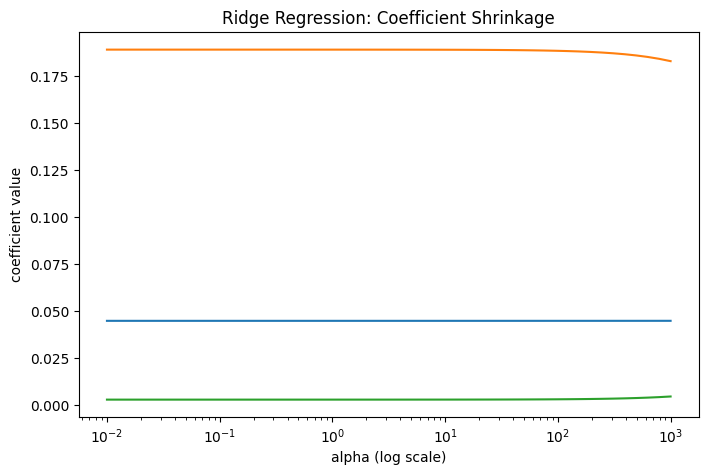

In [ ]:
alphas = np.logspace(-2, 3, 50)
coefficients_path = []

for alpha_value in alphas:
    ridge_model = Ridge(alpha=alpha_value)
    ridge_model.fit(X_train, y_train)
    coefficients_path.append(ridge_model.coef_)

coefficients_path = np.array(coefficients_path)

plt.figure(figsize=(8, 5))
plt.plot(alphas, coefficients_path)
plt.xscale("log")
plt.xlabel("alpha (log scale)")
plt.ylabel("coefficient value")
plt.title("Ridge Regression: Coefficient Shrinkage")
plt.show()

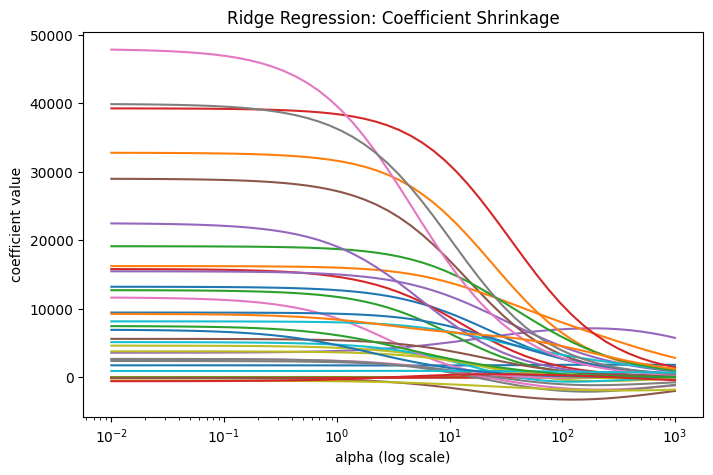

In [ ]:
alphas = np.logspace(-2, 3, 50)
coefficients_path = []

for alpha_value in alphas:
    ridge_model = Ridge(alpha=alpha_value)
    ridge_model.fit(X_train, y_train)
    coefficients_path.append(ridge_model.coef_)

coefficients_path = np.array(coefficients_path)

plt.figure(figsize=(8, 5))
plt.plot(alphas, coefficients_path)
plt.xscale("log")
plt.xlabel("alpha (log scale)")
plt.ylabel("coefficient value")
plt.title("Ridge Regression: Coefficient Shrinkage")
plt.show()

In [ ]:
from sklearn.metrics import r2_score

ridge_r2 = r2_score(y_test, ridge_pred)
print(f"Ridge R2 Score: {ridge_r2}")

lasso_r2 = r2_score(y_test, lasso_pred)
print(f"Lasso R2 Score: {lasso_r2}")

Ridge R2 Score: 0.8597967520700953
Lasso R2 Score: 0.8598090621349498


In [ ]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': np.logspace(-3, 2, 20)}

ridge_cv = GridSearchCV(
    Ridge(),
    param_grid,
    scoring='neg_mean_squared_error',
    cv=5
)

ridge_cv.fit(X_train, y_train)

print(f"Best Alpha (Ridge): {ridge_cv.best_params_['alpha']}")

Best Alpha (Ridge): 0.02069138081114789


In [ ]:
from sklearn.linear_model import Lasso

param_grid_lasso = {'alpha': np.logspace(-3, 2, 20)}

lasso_cv = GridSearchCV(
    Lasso(max_iter=5000),
    param_grid_lasso,
    scoring='neg_mean_squared_error',
    cv=5
)

lasso_cv.fit(X_train, y_train)

print(f"Best Alpha (Lasso): {lasso_cv.best_params_['alpha']}")

Best Alpha (Lasso): 0.0018329807108324356


In [ ]:
alpha_values = [0.001, 0.01, 0.1, 1]

print("RIDGE REGRESSION COEFFICIENTS\n")

for alpha_value in alpha_values:
    ridge_model = Ridge(alpha=alpha_value)
    ridge_model.fit(X_train, y_train)

    print(f"Alpha = {alpha_value}")
    print(pd.Series(ridge_model.coef_, index=x.columns))
    print("-" * 40)


print("\nLASSO REGRESSION COEFFICIENTS\n")

for alpha_value in alpha_values:
    lasso_model = Lasso(alpha=alpha_value, max_iter=5000)
    lasso_model.fit(X_train, y_train)

    print(f"Alpha = {alpha_value}")
    print(pd.Series(lasso_model.coef_, index=x.columns))
    print("-" * 40)

RIDGE REGRESSION COEFFICIENTS

Alpha = 0.001
year                       1755.178283
mileage                      -0.114833
tax                          -9.213399
mpg                        -115.825933
engineSize                 3591.924232
model_ 2 Series            -110.687840
model_ 3 Series            2656.464592
model_ 4 Series            2690.798333
model_ 5 Series            4630.609221
model_ 6 Series            5145.566027
model_ 7 Series           13230.710624
model_ 8 Series           32798.982188
model_ M2                 12732.428713
model_ M3                 15816.554284
model_ M4                 15486.111093
model_ M5                 29005.750314
model_ M6                 11679.577311
model_ X1                  2387.565581
model_ X2                  3794.752864
model_ X3                  8172.147950
model_ X4                  9459.685490
model_ X5                 16248.330385
model_ X6                 19143.750213
model_ X7                 39277.893388
model_ Z3          

In [ ]:
print("Final Ridge Coefficients:")
print(pd.Series(best_ridge.coef_, index=x.columns))

print("\nFinal Lasso Coefficients:")
print(pd.Series(best_lasso.coef_, index=x.columns))

Final Ridge Coefficients:
year                       1754.877187
mileage                      -0.114874
tax                          -9.183100
mpg                        -115.323270
engineSize                 3597.614542
model_ 2 Series            -115.234012
model_ 3 Series            2651.549781
model_ 4 Series            2684.482289
model_ 5 Series            4624.021372
model_ 6 Series            5137.975050
model_ 7 Series           13220.735475
model_ 8 Series           32775.852506
model_ M2                 12712.312007
model_ M3                 15793.044733
model_ M4                 15477.023085
model_ M5                 28968.353797
model_ M6                 11602.767950
model_ X1                  2383.938327
model_ X2                  3792.187473
model_ X3                  8169.792354
model_ X4                  9456.955800
model_ X5                 16244.410737
model_ X6                 19136.396051
model_ X7                 39262.525174
model_ Z3                 22431.240853

In [ ]:
import numpy as np
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

param_grid_ridge = {'alpha': np.logspace(-3, 2, 20)}
ridge_cv = GridSearchCV(
    Ridge(),
    param_grid_ridge,
    scoring='neg_mean_squared_error',
    cv=5
)
ridge_cv.fit(X_train, y_train)

param_grid_lasso = {'alpha': np.logspace(-3, 2, 20)}
lasso_cv = GridSearchCV(
    Lasso(max_iter=5000),
    param_grid_lasso,
    scoring='neg_mean_squared_error',
    cv=5
)
lasso_cv.fit(X_train, y_train)

best_ridge = ridge_cv.best_estimator_
best_lasso = lasso_cv.best_estimator_

ridge_pred = best_ridge.predict(X_test)
lasso_pred = best_lasso.predict(X_test)

print("Ridge MSE:", mean_squared_error(y_test, ridge_pred))
print("Lasso MSE:", mean_squared_error(y_test, lasso_pred))

Ridge MSE: 18130383.620236892
Lasso MSE: 18128791.744146314


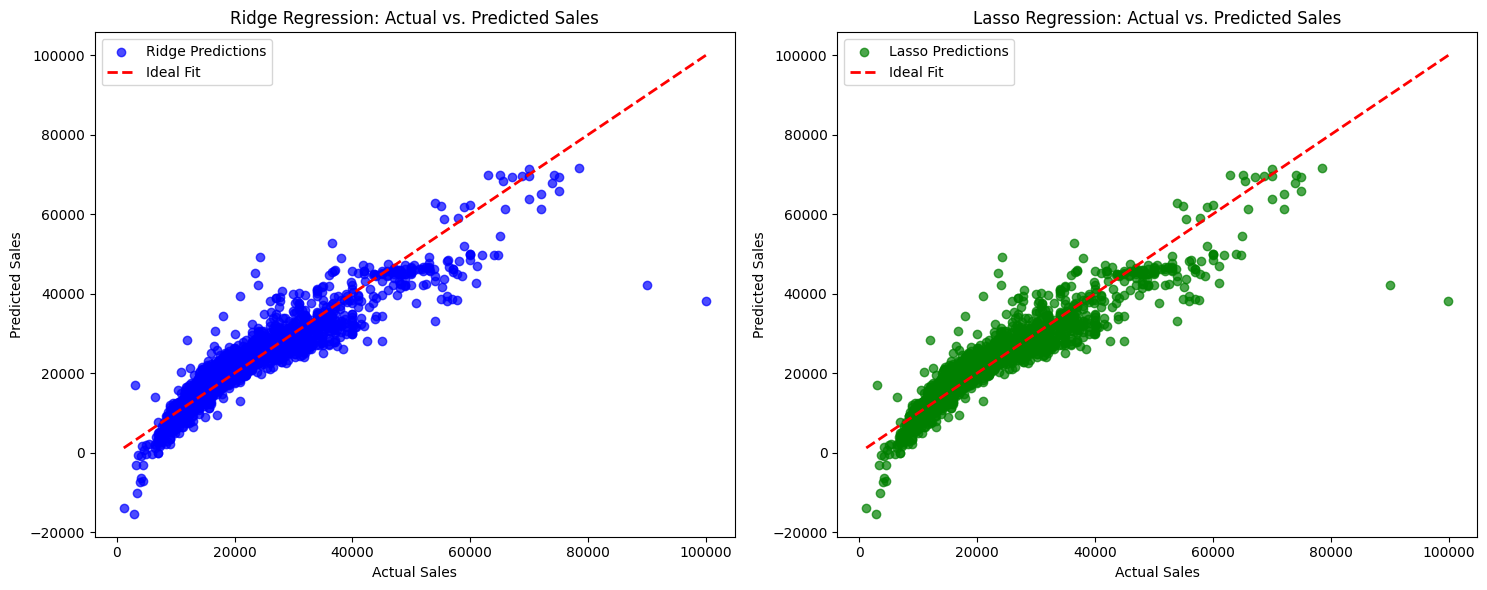

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, ridge_pred, color='blue', label="Ridge Predictions", alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Ridge Regression: Actual vs. Predicted Sales')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test, lasso_pred, color='green', label="Lasso Predictions", alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Lasso Regression: Actual vs. Predicted Sales')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
alpha_values = [0.001, 0.01, 0.1, 1]

print("RIDGE REGRESSION COEFFICIENTS\n")

for alpha_value in alpha_values:
    ridge_model = Ridge(alpha=alpha_value)
    ridge_model.fit(X_train, y_train)

    print(f"Alpha = {alpha_value}")
    print(pd.Series(ridge_model.coef_, index=x.columns))
    print("-" * 40)


print("\nLASSO REGRESSION COEFFICIENTS\n")

for alpha_value in alpha_values:
    lasso_model = Lasso(alpha=alpha_value, max_iter=5000)
    lasso_model.fit(X_train, y_train)

    print(f"Alpha = {alpha_value}")
    print(pd.Series(lasso_model.coef_, index=x.columns))
    print("-" * 40)

RIDGE REGRESSION COEFFICIENTS

Alpha = 0.001
TV           0.044730
Radio        0.189195
Newspaper    0.002761
dtype: float64
----------------------------------------
Alpha = 0.01
TV           0.044730
Radio        0.189195
Newspaper    0.002761
dtype: float64
----------------------------------------
Alpha = 0.1
TV           0.044730
Radio        0.189194
Newspaper    0.002761
dtype: float64
----------------------------------------
Alpha = 1
TV           0.044730
Radio        0.189189
Newspaper    0.002763
dtype: float64
----------------------------------------

LASSO REGRESSION COEFFICIENTS

Alpha = 0.001
TV           0.044729
Radio        0.189191
Newspaper    0.002760
dtype: float64
----------------------------------------
Alpha = 0.01
TV           0.044728
Radio        0.189157
Newspaper    0.002748
dtype: float64
----------------------------------------
Alpha = 0.1
TV           0.044720
Radio        0.188811
Newspaper    0.002627
dtype: float64
------------------------------------


LASSO REGRESSION COEFFICIENTS

Alpha = 0.001
TV           0.044729
Radio        0.189191
Newspaper    0.002760
dtype: float64
----------------------------------------
Alpha = 0.01
TV           0.044728
Radio        0.189157
Newspaper    0.002748
dtype: float64
----------------------------------------
Alpha = 0.1
TV           0.044720
Radio        0.188811
Newspaper    0.002627
dtype: float64
----------------------------------------
Alpha = 100
TV           0.032409
Radio        0.000000
Newspaper    0.000000
dtype: float64
----------------------------------------


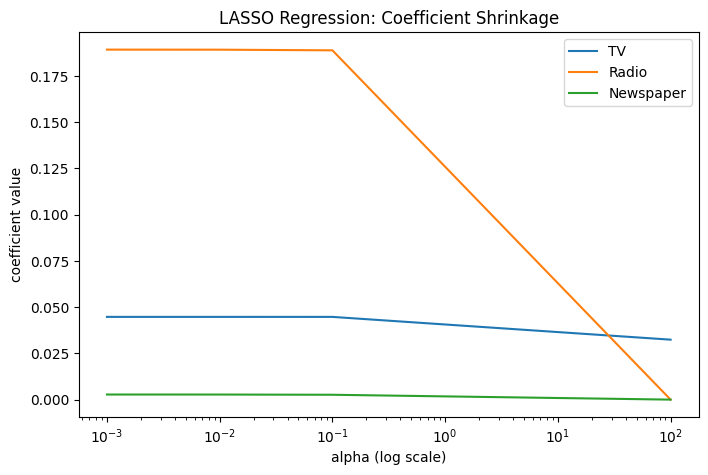

In [ ]:
print("\nLASSO REGRESSION COEFFICIENTS\n")

alpha_values_lasso = [0.001, 0.01, 0.1, 100,]
coefficients_path_lasso = []

for alpha_value in alpha_values_lasso:
    lasso_model = Lasso(alpha=alpha_value, max_iter=5000)
    lasso_model.fit(X_train, y_train)

    print(f"Alpha = {alpha_value}")
    print(pd.Series(lasso_model.coef_, index=x.columns))
    print("-" * 40)
    coefficients_path_lasso.append(lasso_model.coef_)

coefficients_path_lasso = np.array(coefficients_path_lasso)

plt.figure(figsize=(8, 5))
plt.plot(alpha_values_lasso, coefficients_path_lasso)
plt.xscale("log")
plt.xlabel("alpha (log scale)")
plt.ylabel("coefficient value")
plt.title("LASSO Regression: Coefficient Shrinkage")
plt.legend(x.columns)
plt.show()

In [ ]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': np.logspace(-3, 2, 20)}

ridge_cv = GridSearchCV(
    Ridge(),
    param_grid,
    scoring='neg_mean_squared_error',
    cv=5
)

ridge_cv.fit(X_train, y_train)

print("Best Alpha (Ridge):", ridge_cv.best_params_['alpha'])

Best Alpha (Ridge): 0.001


In [ ]:
from sklearn.linear_model import Lasso

param_grid_lasso = {'alpha': np.logspace(-3, 2, 20)}

lasso_cv = GridSearchCV(
    Lasso(max_iter=5000),
    param_grid_lasso,
    scoring='neg_mean_squared_error',
    cv=5
)

lasso_cv.fit(X_train, y_train)

print(f"Best Alpha (Lasso): {lasso_cv.best_params_['alpha']}")

Best Alpha (Lasso): 1.438449888287663


In [ ]:
import numpy as np
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

param_grid_ridge = {'alpha': np.logspace(-3, 2, 20)}
ridge_cv = GridSearchCV(
    Ridge(),
    param_grid_ridge,
    scoring='neg_mean_squared_error',
    cv=5
)
ridge_cv.fit(X_train, y_train)

param_grid_lasso = {'alpha': np.logspace(-3, 2, 20)}
lasso_cv = GridSearchCV(
    Lasso(max_iter=5000),
    param_grid_lasso,
    scoring='neg_mean_squared_error',
    cv=5
)
lasso_cv.fit(X_train, y_train)

best_ridge = ridge_cv.best_estimator_
best_lasso = lasso_cv.best_estimator_

ridge_pred = best_ridge.predict(X_test)
lasso_pred = best_lasso.predict(X_test)

print("Ridge MSE:", mean_squared_error(y_test, ridge_pred))
print("Lasso MSE:", mean_squared_error(y_test, lasso_pred))

Ridge MSE: 3.1740973514255293
Lasso MSE: 3.1341162711720303


In [ ]:
print("Final Ridge Coefficients:")
print(pd.Series(best_ridge.coef_, index=x.columns))

print("\nFinal Lasso Coefficients:")
print(pd.Series(best_lasso.coef_, index=x.columns))

Final Ridge Coefficients:
TV           0.044730
Radio        0.189195
Newspaper    0.002761
dtype: float64

Final Lasso Coefficients:
TV           0.044587
Radio        0.183663
Newspaper    0.000835
dtype: float64


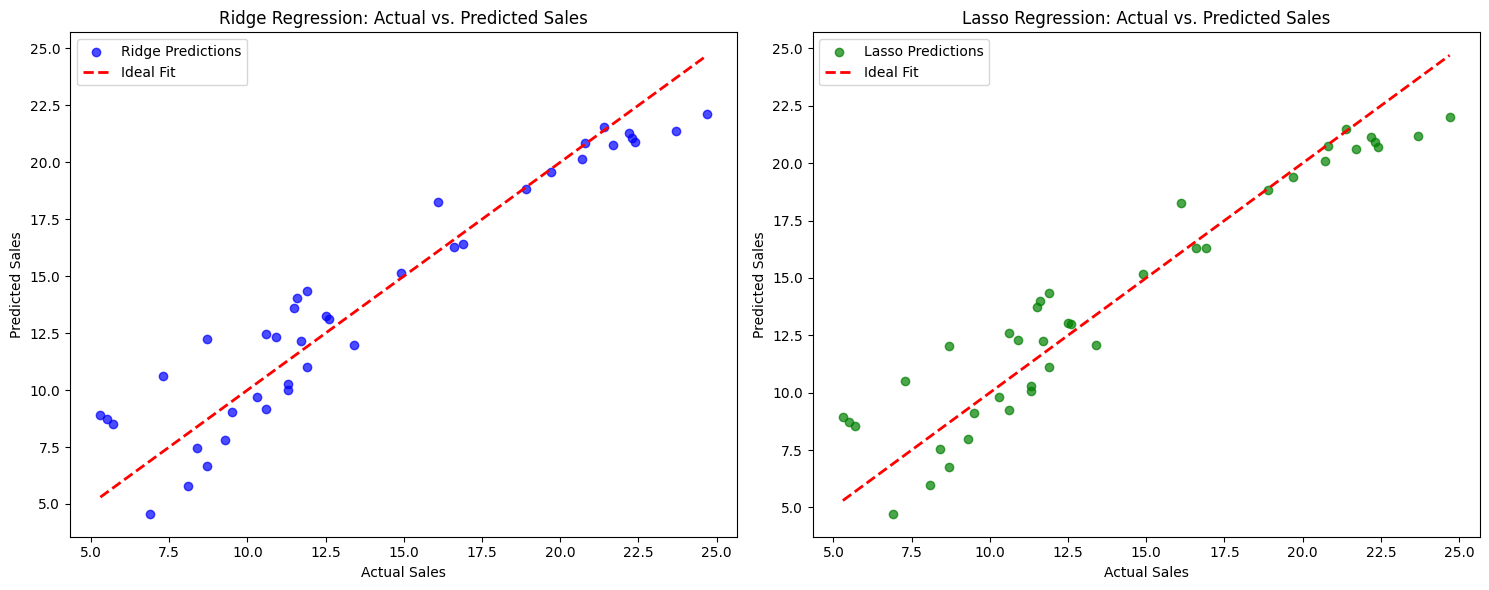

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, ridge_pred, color='blue', label="Ridge Predictions", alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Ridge Regression: Actual vs. Predicted Sales')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test, lasso_pred, color='green', label="Lasso Predictions", alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Lasso Regression: Actual vs. Predicted Sales')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import r2_score

ridge_r2 = r2_score(y_test, ridge_pred)
print(f"Ridge R2 Score: {ridge_r2}")

lasso_r2 = r2_score(y_test, lasso_pred)
print(f"Lasso R2 Score: {lasso_r2}")

Ridge R2 Score: 0.8994380241817195
Lasso R2 Score: 0.9007047075819106


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions on the test set
linear_pred = linear_model.predict(X_test)

# Evaluate the model
linear_mse = mean_squared_error(y_test, linear_pred)
linear_r2 = r2_score(y_test, linear_pred)

print("--- Linear Regression Model ---")
print(f"Mean Squared Error (MSE): {linear_mse}")
print(f"R2 Score: {linear_r2}")
print("\nCoefficients:")
print(pd.Series(linear_model.coef_, index=X_train.columns))


--- Linear Regression Model ---
Mean Squared Error (MSE): 18128757.311038446
R2 Score: 0.8598093284080558

Coefficients:
year                       1755.193662
mileage                      -0.114830
tax                          -9.214945
mpg                        -115.851588
engineSize                 3591.634486
model_ 2 Series            -110.456626
model_ 3 Series            2656.714375
model_ 4 Series            2691.119581
model_ 5 Series            4630.944249
model_ 6 Series            5145.951672
model_ 7 Series           13231.217234
model_ 8 Series           32800.156596
model_ M2                 12733.450961
model_ M3                 15817.749956
model_ M4                 15486.572596
model_ M5                 29007.651524
model_ M6                 11683.500392
model_ X1                  2387.749826
model_ X2                  3794.882764
model_ X3                  8172.266947
model_ X4                  9459.823148
model_ X5                 16248.528523
model_ X6            

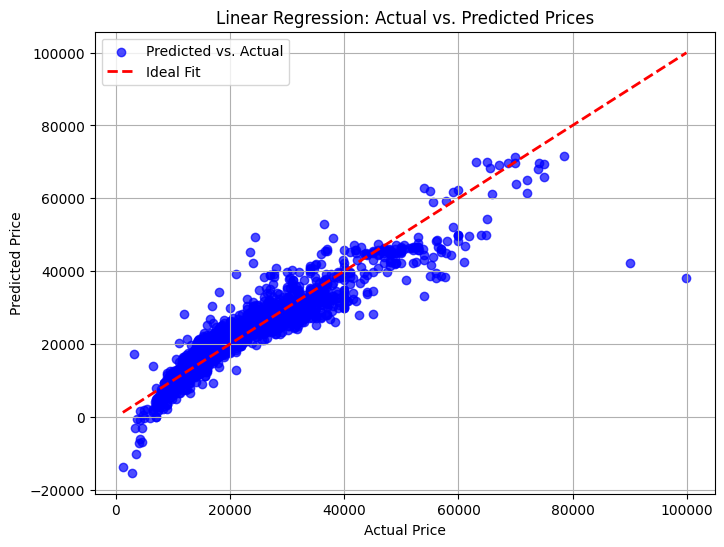

In [ ]:
# Visualize Actual vs. Predicted values for Linear Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, linear_pred, color='blue', alpha=0.7, label='Predicted vs. Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Linear Regression: Actual vs. Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()